# Load Data - Select picked Z
pick_Z_Tr1 = 7940
pick_Z_Tr2 = 11388
pick_notZ_ = 0?

In [2]:
from obspy import read
import os
# data_st.write(file, format="SAC")

#Tr1_pd = "/home/silvia/Desktop/Data/DETECT/Tr_1_picked_Z"
Tr2_pd = "/home/silvia/Desktop/Data/DETECT/Tr_2_picked_Z"

#Tr1 = "/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/Tracce_First_part_new"
Tr2 = "/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/Tracce_Second_part_new"

Tr_f = os.listdir(Tr2)
Tr_f.sort()
pick_tot = 0
# pick_Z = 0
for it0 in Tr_f: # it0 tipical = "211205015137"
    for it1 in os.scandir(f"{Tr2}/{it0}"):         # it1 typical = /home/silvia/Desktop/Data/DETECT/transfer_14589_files_1470713b/Traces_2/211214033749/S0101.CHZ.sac
        if it1.path[-5] == "Z":
            b = read(it1.path)
            if "a" in b[0].stats.sac:
                b.write(f"{Tr2_pd}/{it1.path.split('/')[-2]}.{it1.path.split('/')[-1]}",format="SAC")
                pick_tot += 1
            #print(it1.path)


# Create custom Dataset

In [1]:
from obspy import read
import os
import pandas as pd
import numpy as np
meta = pd.read_csv("/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/catalog_with_ID_abs_locations.txt")

Xcorso = "/home/silvia/Desktop/Data/DETECT/Tr_2_picked_Z"
Tr_l = os.listdir(Xcorso)
Tr_l.sort()
trace_name = []
source_latitude_deg = []
source_longitude_deg = []
source_depth = []
source_origin_time = []
station_code = []
station_channels = []
trace_start_time = []
trace_P_arrival_sample = []
source_magnitude = []
source_magnitude_type = []
sampling_rate = []

x2 = np.zeros((len(Tr_l),800))
for i,name in enumerate(Tr_l):
    b = read(f"{Xcorso}/{name}")
    meta_tr = meta[meta["ID"] == int(name.split(".")[0])]

    trace_name.append(name[:-4])

    source_latitude_deg.append(meta_tr["LAT"].iloc[0])
    source_longitude_deg.append(meta_tr["LON"].iloc[0])
    source_depth.append(meta_tr["DEP"].iloc[0])
    source_origin_time.append(meta_tr["TIME"].iloc[0])

    station_code.append(b[0].stats.station)
    station_channels.append(b[0].stats.channel)
    trace_start_time.append(b[0].stats.starttime)
    trace_P_arrival_sample.append(int(b[0].stats.sac.a * b[0].stats.sampling_rate))

    source_magnitude.append(meta_tr["ML"].iloc[0])
    
    source_magnitude_type.append("ML")
    sampling_rate.append(b[0].stats.sampling_rate)
    x2[i] = b[0].data[trace_P_arrival_sample[-1]-400: trace_P_arrival_sample[-1]+400]


dizio2 = {"trace_name":trace_name,"source_latitude_deg": source_latitude_deg, "source_longitude_deg":source_longitude_deg, "source_depth":source_depth,
          "source_origin_time":source_origin_time,"station_code":station_code, "station_channels": station_channels, "trace_start_time": trace_start_time,
          "trace_P_arrival_sample":trace_P_arrival_sample, "source_magnitude":source_magnitude,"source_magnitude_type":source_magnitude_type,"sampling_rate":sampling_rate}
dizio2["centrato"] = [True for i in range(len(x2))]
dizio2["demeaned"] = [False for i in range(len(x2))]
dizio2["normalized"] = [False for i in range(len(x2))]

In [5]:
len(dizio2["trace_name"])

11379

In [6]:
from obspy import read
import os
import pandas as pd
import numpy as np
meta = pd.read_csv("/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/catalog_with_ID_abs_locations.txt")

Xcorso = "/home/silvia/Desktop/Data/DETECT/Tr_1_picked_Z"
Tr_l = os.listdir(Xcorso)
Tr_l.sort()
trace_name = []
source_latitude_deg = []
source_longitude_deg = []
source_depth = []
source_origin_time = []
station_code = []
station_channels = []
trace_start_time = []
trace_P_arrival_sample = []
source_magnitude = []
source_magnitude_type = []
sampling_rate = []

x1 = np.zeros((len(Tr_l),800))
for i,name in enumerate(Tr_l):
    b = read(f"{Xcorso}/{name}")
    meta_tr = meta[meta["ID"] == int(name.split(".")[0])]

    trace_name.append(name[:-4])

    source_latitude_deg.append(meta_tr["LAT"].iloc[0])
    source_longitude_deg.append(meta_tr["LON"].iloc[0])
    source_depth.append(meta_tr["DEP"].iloc[0])
    source_origin_time.append(meta_tr["TIME"].iloc[0])

    station_code.append(b[0].stats.station)
    station_channels.append(b[0].stats.channel)
    trace_start_time.append(b[0].stats.starttime)
    trace_P_arrival_sample.append(int(b[0].stats.sac.a * b[0].stats.sampling_rate))

    source_magnitude.append(meta_tr["ML"].iloc[0])
    
    source_magnitude_type.append("ML")
    sampling_rate.append(b[0].stats.sampling_rate)
    x1[i] = b[0].data[trace_P_arrival_sample[-1]-400: trace_P_arrival_sample[-1]+400]


dizio1 = {"trace_name":trace_name,"source_latitude_deg": source_latitude_deg, "source_longitude_deg":source_longitude_deg, "source_depth":source_depth,
          "source_origin_time":source_origin_time,"station_code":station_code, "station_channels": station_channels, "trace_start_time": trace_start_time,
          "trace_P_arrival_sample":trace_P_arrival_sample, "source_magnitude":source_magnitude,"source_magnitude_type":source_magnitude_type,"sampling_rate":sampling_rate}
dizio1["centrato"] = [True for i in range(len(x1))]
dizio1["demeaned"] = [False for i in range(len(x1))]
dizio1["normalized"] = [False for i in range(len(x1))]

In [7]:
dizio_tot = {}
for key in dizio1:
    dizio_tot[key] = dizio1[key]+dizio2[key]
xtot = np.concatenate((x1, x2), axis = 0) 

ids = []
for i in dizio_tot["trace_name"]:
    ids.append(i.split(".")[0])
dizio_tot["source_id"] = ids

In [16]:
xtot.shape

(22776, 800)

In [17]:
from Classe_sismogramma_v3 import ClasseDataset
D = ClasseDataset()
D.sismogramma = xtot
D.metadata = dizio_tot
hd = "/home/silvia/Desktop/Data/DETECT/data_Tr1+Tr2_picked2.hdf5"
cs = "/home/silvia/Desktop/Data/DETECT/metadata_Tr1+Tr2_picked2.csv"
D.centrato = True
D.crea_custom_dataset(hd,cs)

sto creando hdf5
ho creato hdf5


 PANDAS HA AGITO 0.5883748779306188


In [2]:
from Classe_sismogramma_v3 import ClasseDataset
D = ClasseDataset()

hd = "/home/silvia/Desktop/Data/DETECT/data_Tr1+Tr2_picked.hdf5"
cs = "/home/silvia/Desktop/Data/DETECT/metadata_Tr1+Tr2_picked.csv"

D.leggi_custom_dataset(hd,cs)

# Ricava eventi picked - Plot delle stesse.
Da modificare

In [7]:
# Ricavo eventi picked
import matplotlib.pyplot as plt
from Classe_sismogramma_v3 import ClasseDataset
import pandas as pd

D = ClasseDataset()
hd = "/home/silvia/Desktop/Data/DETECT/data_Tr1+Tr2_picked.hdf5"
cs = "/home/silvia/Desktop/Data/DETECT/metadata_Tr1+Tr2_picked.csv"
D.leggi_custom_dataset(hd,cs)

a = pd.DataFrame.from_dict(D.metadata)

list_source = []
list_lat = []
list_lon = []
list_dep = []
list_mag = []
list_num_P_picked = []

for i in a.source_id:
    if not(i in list_source):
        list_source.append(i)

for k in list_source: 
    aa = a[a["source_id"]==k]
    list_lat.append(aa["source_latitude_deg"].iloc[0])    
    list_lon.append(aa["source_longitude_deg"].iloc[0])    
    list_dep.append(aa["source_depth"].iloc[0])
    list_mag.append(aa["source_magnitude"].iloc[0])
    list_num_P_picked.append(len(aa))

map_events_picked = pd.DataFrame.from_dict({"source_id": list_source,"source_latitude_deg":list_lat, "source_longitude_deg": list_lon, "source_depth": list_dep, 
                                     "source_magnitude":list_mag, "number_P_picks": list_num_P_picked})
map_events_picked.to_csv("/home/silvia/Desktop/Data/DETECT/Map_events_Picks.csv", index=False)


In [8]:
# plot picked in base a magnitudo e num. pick
"""
DA FARE:    metti depth in "negativo"
            cambia da lat,lon -> x,y nello spazio "reale"
"""
import pandas as pd
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
import math

map_events_picked = pd.read_csv("/home/silvia/Desktop/Data/DETECT/Map_events_Picks.csv")
colorscale_custom = [
    [0.0, 'red'],           # a 0 rossi
    [0.042, 'red'],         # tra 1 e 6 rossi
    [0.069, 'blue'],        # Valori tra 7 e 10 saranno rosso-blu
    [0.14, 'green'],        # Valori tra 10 e 20 saranno blu-verdi
    [1.0, 'green'],         # Valori superiori a 20 saranno verdi
]

sizes = []
for i in map_events_picked["source_magnitude"]:
    if not math.isnan(i):
        sizes.append(i*2.0+4.5)
    else:
        sizes.append(1.5)

df = map_events_picked[["source_latitude_deg","source_longitude_deg", "source_depth"]]


# Create an interactive 3D scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=df['source_latitude_deg'],
    y=df['source_longitude_deg'],
    z=df['source_depth'],
    mode='markers',
    marker=dict(
        size=sizes,
        opacity=0.7,
        color=map_events_picked["number_P_picks"],
        colorscale=colorscale_custom,  # Usa la colormap personalizzata
        colorbar=dict(title='Color Scale', tickvals=[7, 10, 20], ticktext=['7<: Red','10 Blue', '>20: green']),  # Aggiungi la colorbar personalizzata
    ),
    name='Picked'
))

fig.update_layout(
    scene=dict(
        xaxis_title='Latitude',
        yaxis_title='Longitude',
        zaxis_title='Depth'
    ),
    title='Mappa eventi in base a numero di tracce con pick'
)

# Save the plot to an HTML file
fig.write_html("/home/silvia/Desktop/Plot_qualcosa.html")

<AxesSubplot:>

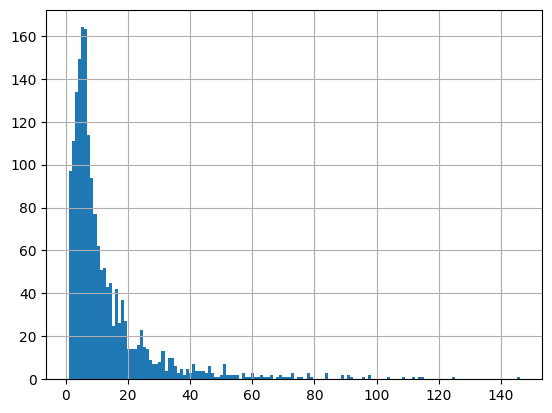

In [9]:
map_events_picked["number_P_picks"].hist(bins=146)

# Verify events in catalogue are in T1 or T2 folders

In [12]:
# Ho trovato 19.328 pick dalle tracce e 22.000 dal catalogo. catalogo ha più eventi, se considero quelli
# comuni ho 19.330 pick (ok)
import os
import pandas as pd
meta = pd.read_csv("/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/catalog_with_ID_abs_locations.txt")
Tr1 = "/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/Tracce_First_part_new"
Tr2 = "/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/Tracce_Second_part_new"
Tr1_f = os.listdir(Tr1)
Tr2_f = os.listdir(Tr2)
len(Tr1_f)+ len(Tr2_f)

ID_list = list(meta["ID"])
T_tot = Tr1_f + Tr2_f

for ti in T_tot:
    if int(ti) in ID_list:
        4                       # verifico se perogni evento in tracce sac, è anche in catalogo. Si
    else:
        print("No OK")

pat = "/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/picks/P_pick_merged.txt"
picks = pd.read_csv(pat)
# Seleziono eventi catalogo che sono anche in tracce sac (indici di pd.dataframe picks)
cat_sac_indx = [ False for i in range(len(meta["ID"]))]
for name in T_tot:
    ix = meta[meta["ID"] == int(name)].index
    cat_sac_indx[ix[0]] = True

# Seleziono tutti e soli i pick del catalogo che sono anche in Tracce sac
picks_common = picks[cat_sac_indx]


picks_common = (picks_common != "NaT")
picks_common = picks_common + 0.0
picks_common.sum().sum()

22779.0

# Downsampling

In [1]:

from Classe_sismogramma_v3 import ClasseDataset
import numpy as np
import scipy

hd = "/home/silvia/Desktop/Data/DETECT/data_Tr1+Tr2_picked.hdf5"
cs = "/home/silvia/Desktop/Data/DETECT/metadata_Tr1+Tr2_picked.csv"

D = ClasseDataset()
D.leggi_custom_dataset(hd,cs)

D_downsampled = ClasseDataset()
D_downsampled.leggi_custom_dataset(hd,cs)


In [2]:
D_downsampled.sismogramma = scipy.signal.decimate(D_downsampled.sismogramma, 2)

In [3]:
D.demean()
D_downsampled.demean()

In [4]:
D.normalizza()
D_downsampled.normalizza()

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [5]:
hdf1 = "/home/silvia/Desktop/Data/DETECT/Detect_data_picked_normalized_downsampled.hdf5"
csv1 = "/home/silvia/Desktop/Data/DETECT/Detect_metadata_picked_normalized_downsampled.csv"

D_downsampled.crea_custom_dataset(hdf1,csv1)


sto creando hdf5
ho creato hdf5


 PANDAS HA AGITO 0.3362800700124353


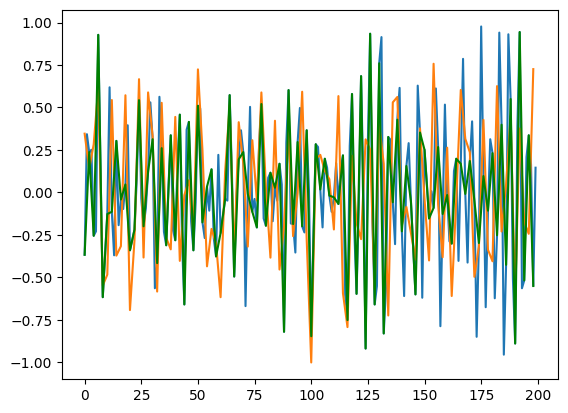

In [7]:
import matplotlib.pyplot as plt
a = 1225
plt.plot(D.sismogramma[a][300:500])
plt.plot([2*i for i in range(100)], D_downsampled.sismogramma[a][150:250])
plt.plot([2*i for i in range(100)], D.sismogramma[a,::2][150:250], color="green")

# Read quality Pick

In [1]:
import pandas as pd
patqp = "/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/picks/P_weight_merged.txt"
patcat = "/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/catalog_with_ID_abs_locations.txt"
qual_pick = pd.read_csv(patqp)
catalog = pd.read_csv(patcat)
meta_pred_16 = pd.read_csv ("/home/silvia/Desktop/Data/DETECT/metadata_Tr1+Tr2_picked.csv")


In [14]:
catalog.iloc[0:2]

,ID,TIME,LAT,LON,DEP,ML,RMS,ERR_H,ERR_Z
0,210901012118,2021-09-01 01:21:18,40.6570,15.4242,5.0,-0.98,0.93,0.4,0.3
1,210901020904,2021-09-01 02:09:04,40.7138,15.3785,2.2,-0.20,0.10,1.3,1.1


In [15]:
qual_pick.iloc[0:2]

,S0101,S0201,S0301,S0401,S0501,S0601,S0701,S0801,S0901,S1001,...,S0120,S0220,S0320,S0420,S0520,S0620,S0720,S0820,S0920,S1020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
meta_pred_16.iloc[0:3]

,trace_name,source_latitude_deg,source_longitude_deg,source_depth,source_origin_time,station_code,station_channels,trace_start_time,trace_P_arrival_sample,source_magnitude,source_magnitude_type,sampling_rate,centrato,demeaned,normalized,source_id
0,210901012118.S0112.CHZ,40.657,15.4242,5.0,2021-09-01 01:21:18,S0112,CHZ,2021-09-01T01:20:48.000000Z,6550,-0.98,ML,200.0,True,False,False,210901012118
1,210901012118.S0114.CHZ,40.657,15.4242,5.0,2021-09-01 01:21:18,S0114,CHZ,2021-09-01T01:20:48.000000Z,6431,-0.98,ML,200.0,True,False,False,210901012118
2,210901012118.S0213.CHZ,40.657,15.4242,5.0,2021-09-01 01:21:18,S0213,CHZ,2021-09-01T01:20:48.000000Z,6455,-0.98,ML,200.0,True,False,False,210901012118


In [7]:
ID = meta_pred_16["trace_name"][0].split(".")[0]
ID

ind = catalog[catalog["ID"] == int(ID)].index[0]
ind

qual_pick.iloc[ind][meta_pred_16["trace_name"][0].split(".")[1]]
ind

,ID,TIME,LAT,LON,DEP,ML,RMS,ERR_H,ERR_Z
0,210901012118,2021-09-01 01:21:18,40.657,15.4242,5.0,-0.98,0.93,0.4,0.3


In [8]:
qualities = []
for name in meta_pred_16["trace_name"]:
    ID = name.split(".")[0]
    ind = catalog[catalog["ID"] == int(ID)].index[0]
    quality = qual_pick.iloc[ind][name.split(".")[1]]
    qualities.append(int(quality))
meta_pred_16["Pick_quality"] = qualities

In [9]:
meta_pred_16.to_csv("/home/silvia/Desktop/Data/DETECT/metadata_Tr1+Tr2_picked.csv", index=False)

In [10]:
meta_pred_16 = pd.read_csv ("/home/silvia/Desktop/Data/DETECT/metadata_Tr1+Tr2_picked.csv")
meta_pred_16


,trace_name,source_latitude_deg,source_longitude_deg,source_depth,source_origin_time,station_code,station_channels,trace_start_time,trace_P_arrival_sample,source_magnitude,source_magnitude_type,sampling_rate,centrato,demeaned,normalized,source_id,Pick_quality
0,210901012118.S0112.CHZ,40.6570,15.4242,5.0,2021-09-01 01:21:18,S0112,CHZ,2021-09-01T01:20:48.000000Z,6550,-0.98,ML,200.0,True,False,False,210901012118,0
1,210901012118.S0114.CHZ,40.6570,15.4242,5.0,2021-09-01 01:21:18,S0114,CHZ,2021-09-01T01:20:48.000000Z,6431,-0.98,ML,200.0,True,False,False,210901012118,0
2,210901012118.S0213.CHZ,40.6570,15.4242,5.0,2021-09-01 01:21:18,S0213,CHZ,2021-09-01T01:20:48.000000Z,6455,-0.98,ML,200.0,True,False,False,210901012118,0
3,210901012118.S0313.DHZ,40.6570,15.4242,5.0,2021-09-01 01:21:18,S0313,DHZ,2021-09-01T01:20:48.000000Z,6490,-0.98,ML,200.0,True,False,False,210901012118,0
4,210901012118.S0314.DHZ,40.6570,15.4242,5.0,2021-09-01 01:21:18,S0314,DHZ,2021-09-01T01:20:48.000000Z,6563,-0.98,ML,200.0,True,False,False,210901012118,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22771,220228163700.S1017.DHZ,40.5904,15.5486,8.8,2022-02-28 16:37:00,S1017,DHZ,2022-02-28T16:36:30.000000Z,6700,0.98,ML,200.0,True,False,False,220228163700,0
22772,220228163810.S0115.CHZ,40.6267,15.5810,1.2,2022-02-28 16:38:10,S0115,CHZ,2022-02-28T16:37:40.000000Z,6462,-0.12,ML,200.0,True,False,False,220228163810,2
22773,220228163810.S0215.CHZ,40.6267,15.5810,1.2,2022-02-28 16:38:10,S0215,CHZ,2022-02-28T16:37:40.000000Z,6462,-0.12,ML,200.0,True,False,False,220228163810,0
22774,220228163810.S0315.DHZ,40.6267,15.5810,1.2,2022-02-28 16:38:10,S0315,DHZ,2022-02-28T16:37:40.000000Z,6462,-0.12,ML,200.0,True,False,False,220228163810,1


# Scelta criterio tracce con polarità

In [1]:
import pandas as pd 

uno_pat = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/More_16/Predizioni_Detect_downsampled_More_16.csv"


uno = pd.read_csv(uno_pat)


nomi = uno["traccia"]

uno = uno.drop(["traccia", "y_Mano"], axis=1)




<AxesSubplot:>

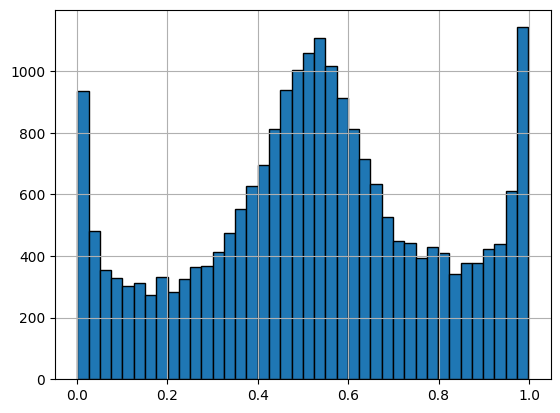

In [6]:
uno.mean(axis=1).hist(bins=40,edgecolor="black")

<AxesSubplot:>

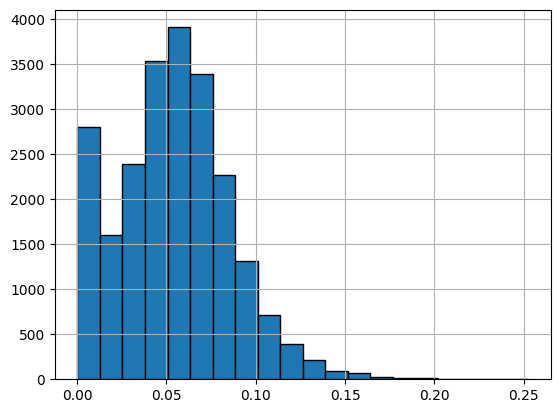

In [11]:
uno.std(axis=1).hist(bins=20,edgecolor="black")

In [14]:
std = uno.std(axis=1)

In [20]:
std[std>0.1].sort_values()

8238     0.100012
7801     0.100012
12706    0.100019
21800    0.100053
12989    0.100083
           ...   
6008     0.195679
6621     0.200051
9436     0.200053
6536     0.208931
8939     0.252564
Length: 1616, dtype: float64

In [25]:
uno.iloc[9436,:]

y_predict5    0.682877
y_predict6    0.287766
y_predict1    0.742120
y_predict7    0.411946
y_predict0    0.322059
y_predict2    0.776379
y_predict3    0.379597
y_predict4    0.387064
Name: 9436, dtype: float64

# Inset in Sac traces the metadata:
(Quality_pick, SNR, pred1, pred2, predmean)

In [37]:
import pandas as pd
import os
import obspy
aia = pd.read_csv("/home/silvia/Desktop/Data/DETECT/Detect_Pick_SNR_Predictions16.csv")
Tr1_pat = "/home/silvia/Desktop/Data/DETECT/Tr_1_picked_Z/"
Tr2_pat = "/home/silvia/Desktop/Data/DETECT/Tr_2_picked_Z/"
Trm_pat = "/home/silvia/Desktop/Data/DETECT/Tr_picked_Z_SNR,qual,predictions/"
Tr1_f = os.listdir(Tr1_pat)
Tr2_f = os.listdir(Tr2_pat)


for i in range(len(aia["trace_name"])):
    name = aia["trace_name"][i]
    if f"{name}.sac" in Tr1_f:
        b = obspy.read(f"{Tr1_pat}{name}.sac")
    else:
        b = obspy.read(f"{Tr2_pat}{name}.sac")
        
    b[0].stats.sac.user0 = aia["Pick_quality"][i]
    b[0].stats.sac.user1 = aia["trace_Z_snr_db"][i]
    b[0].stats.sac.user2 = aia["pred_downsampled_1"][i]
    b[0].stats.sac.user3 = aia["pred_downsampled_2"][i]
    b[0].stats.sac.user4 = aia["pred_downsampled_mean"][i]
        
    b.write(f"{Trm_pat}{name}.sac", format="SAC")

In [35]:
aa = obspy.read("/home/silvia/Desktop/Data/DETECT/Tr_picked_Z_SNR,qual,predictions/210925092812.S0715.DHZ.sac")

In [36]:
aa[0].stats.sac.user0

2.0

In [ ]:
"/home/silvia/Desktop/Data/DETECT/Tr_2_picked_Z/211214033749.S0104.CHZ.sac"

# Calc interstazione
cos a = cos b cos c + sin b sin c cos A (a,b,c sono gli archi del triangolo sferico, A l'angolo sferico opposto ad a) <br>
Nel nostro caso A è 90°, quindi il seno è nullo <br>
Mentre b è la differenza delle longitudini e c la differenza delle latitudini delle 2 stazioni <br> <br>
RT = 6373

In [1]:
import pandas as pd
import numpy as np
sta = pd.read_csv("/home/silvia/Desktop/Data/DETECT/staz_lat_lon_pick.csv")
s = list(sta.keys())
s.sort()
dists = np.zeros((len(s),len(s)))

sta["S0112"]

for i in range(len(s)):
    for j in range(len(s)):
        lat1 = sta[s[i]][0]
        lon1 = sta[s[i]][1]
        lat2 = sta[s[j]][0]
        lon2 = sta[s[j]][1]
        dists[i][j] = np.arccos(np.cos(np.deg2rad(lat1 - lat2)) * np.cos(np.deg2rad(lon1 - lon2)))
dists_pd = pd.DataFrame(dists, columns=s)
dists_pd.index = s
dists_pd.to_csv("/home/silvia/Desktop/Data/DETECT/Distanze_interstazione_picked_rad.csv")

# Direttive Mauro (lat,lon,num_pick,...)

In [5]:
# lat e longitude
import pandas as pd
import obspy
import os
import gc
import numpy as np
a = pd.read_csv("/home/silvia/Desktop/Data/DETECT/Events_picked_Metadata.csv")
tr1 = "/home/silvia/Desktop/Data/DETECT/Tr_1_picked_Z/"
tr2 = "/home/silvia/Desktop/Data/DETECT/Tr_2_picked_Z/"

tr1l = os.listdir(tr1)
tr2l = os.listdir(tr2)

for i in range(len(tr1l)):
    tr1l[i] = tr1l[i][0:12]
for i in range(len(tr2l)):
    tr2l[i] = tr2l[i][0:12]

mea_lat = []
min_lat = []
max_lat = []
med_lat = []
std_lat = []

mea_lon = []
min_lon = []
max_lon = []
med_lon = []
std_lon = []

for j in range(len(a["source_id"])):
    lats = []
    lons = []
    gc.collect()
    name = str(a["source_id"][j])
    
    if name in tr1l:
        b = obspy.read(f"{tr1}{name}*")
    else:
        b = obspy.read(f"{tr2}{name}*")

    for i in range(len(b)):
        lats.append(b[i].stats.sac["stla"])
        lons.append(b[i].stats.sac["stlo"])
    
    mea_lat.append(np.mean(lats))
    min_lat.append(np.min(lats))
    max_lat.append(np.max(lats))
    med_lat.append(np.median(lats))
    std_lat.append(np.std(lats))

    mea_lon.append(np.mean(lons))
    min_lon.append(np.min(lons))
    max_lon.append(np.max(lons))
    med_lon.append(np.median(lons))
    std_lon.append(np.std(lons))

a["mean_lat_stat_pick"] = mea_lat
a["min_lat_stat_pick"] = min_lat
a["max_lat_stat_pick"] = max_lat
a["median_lat_stat_pick"] = med_lat
a["std_lat_stat_pick"] = std_lat

a["mean_lon_stat_pick"] = mea_lon
a["min_lon_stat_pick"] = min_lon
a["max_lon_stat_pick"] = max_lon
a["median_lon_stat_pick"] = med_lon
a["std_lon_stat_pick"] = std_lon

a.to_csv("/home/silvia/Desktop/Data/DETECT/Events_picked_Metadata_new.csv", index=False)

In [ ]:
# interstation distances
import pandas as pd
import obspy
import os
import gc
import numpy as np
a = pd.read_csv("/home/silvia/Desktop/Data/DETECT/Events_picked_Metadata.csv")
tr1 = "/home/silvia/Desktop/Data/DETECT/Tr_1_picked_Z/"
tr2 = "/home/silvia/Desktop/Data/DETECT/Tr_2_picked_Z/"
tr1l = os.listdir(tr1)
tr2l = os.listdir(tr2)
for i in range(len(tr1l)):
    tr1l[i] = tr1l[i][0:12]
for i in range(len(tr2l)):
    tr2l[i] = tr2l[i][0:12]

RT = 6373 # Km
si = pd.read_csv("/home/silvia/Desktop/Data/DETECT/Distanze_interstazione_picked_rad.csv").set_index("Unnamed: 0")  # pd_datf distanze angolari tra strazioni
si = si * 6373 

min_dist = []
max_dist = []
mea_dist = []
med_dist = []
std_dist = []

for j in range(len(a["source_id"])):
    stations = []
    dist_si_sk = []
    gc.collect()
    name = str(a["source_id"][j])
    
    if name in tr1l:
        b = obspy.read(f"{tr1}{name}*")
    else:
        b = obspy.read(f"{tr2}{name}*")
    
    for i in range(len(b)):
        stations.append(b[i].stats.station)

    for i in stations:
        for k in stations:
            if i != k:
                dist_si_sk.append(si[i][k])
    if len(b) == 1
    dist_si_sk.appen(0)
    
    min_dist.append(np.min(dist_si_sk))
    max_dist.append(np.max(dist_si_sk))
    mea_dist.append(np.mean(dist_si_sk))
    med_dist.append(np.median(dist_si_sk))
    std_dist.append(np.std(dist_si_sk))

a["mean_dist_stat_pick"] = mea_dist 
a["min_dist_stat_pick"] = min_dist
a["max_dist_stat_pick"] = max_dist
a["median_dist_stat_pick"] = med_dist
a["std_dist_stat_pick"] = std_dist


a.to_csv("/home/silvia/Desktop/Data/DETECT/Events_picked_Metadata_new.csv", index=False)

ValueError: zero-size array to reduction operation minimum which has no identity

In [6]:
max_dist

[20.395723444473603]

In [19]:
import pandas as pd
si = pd.read_csv("/home/silvia/Desktop/Data/DETECT/Distanze_interstazione_picked_rad.csv").set_index("Unnamed: 0")
si*60

,S0101,S0102,S0103,S0104,S0105,S0106,S0107,S0108,S0109,S0110,...,S1011,S1012,S1013,S1014,S1015,S1016,S1017,S1018,S1019,S1020
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
S0101,0.000000,0.166196,0.255603,0.209619,0.172784,0.328329,0.321496,0.365376,0.445832,0.355567,...,0.479209,0.469504,0.510127,0.551902,0.685807,0.633916,0.772010,0.844054,0.806868,0.753357
S0102,0.166196,0.000000,0.108041,0.110078,0.183385,0.243819,0.191982,0.311166,0.357064,0.246346,...,0.361679,0.410805,0.426468,0.472045,0.600465,0.550651,0.678060,0.755079,0.697618,0.629046
S0103,0.255603,0.108041,0.000000,0.074413,0.191602,0.162091,0.086889,0.241046,0.263025,0.148146,...,0.256040,0.330032,0.332229,0.378215,0.502070,0.453757,0.576048,0.654080,0.591650,0.521168
S0104,0.209619,0.110078,0.074413,0.000000,0.117296,0.135791,0.112803,0.201152,0.252340,0.149073,...,0.271630,0.301016,0.321004,0.365967,0.496736,0.446026,0.577657,0.653183,0.604295,0.545200
S0105,0.172784,0.183385,0.191602,0.117296,0.000000,0.175386,0.211490,0.195329,0.285569,0.217811,...,0.336605,0.298218,0.345181,0.384644,0.518500,0.466537,0.606917,0.676601,0.648770,0.606731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1016,0.633916,0.550651,0.453757,0.446026,0.466537,0.311070,0.368205,0.271607,0.193830,0.305943,...,0.216115,0.174920,0.125174,0.082042,0.051973,0.000000,0.142475,0.210223,0.205502,0.226339
S1017,0.772010,0.678060,0.576048,0.577657,0.606917,0.445391,0.489172,0.412872,0.326942,0.431783,...,0.322967,0.317374,0.262115,0.222883,0.092392,0.142475,0.000000,0.079650,0.090037,0.175257
S1018,0.844054,0.755079,0.654080,0.653183,0.676601,0.519546,0.567276,0.481435,0.401244,0.508753,...,0.402115,0.381784,0.334321,0.292263,0.158274,0.210223,0.079650,0.000000,0.127023,0.233811


In [17]:
si["S0101"]["S0505"]

0.002884131827531

In [11]:
b[0].stats.station

'S0409'

In [10]:
b

1 Trace(s) in Stream:
ZK.S0409..DHZ | 2021-09-09T23:24:31.000000Z - 2021-09-09T23:25:31.000000Z | 200.0 Hz, 12001 samples